### Baseline Time Series Model

In [1]:
import pandas as pd
from pathlib import Path
import numpy as np

In [2]:
PROC = Path("../data/processed/AAPL_clean.csv")
df = pd.read_csv(PROC, parse_dates=["Date"], index_col="Date")

In [3]:
split_point = int(len(df) * 0.8)
train = df.iloc[:split_point]
valid = df.iloc[split_point:].copy()

print(f"Train shape: {train.shape}, Valid shape: {valid.shape}")

Train shape: (1569, 10), Valid shape: (393, 10)


In [4]:
valid['Naive_Pred'] = train['Close'].iloc[-1]

In [5]:
type(valid['Close'])

pandas.core.series.Series

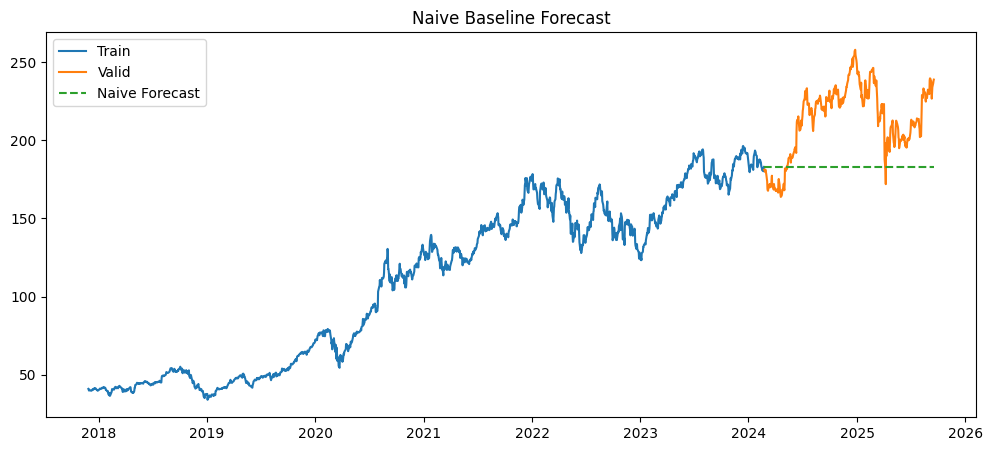

In [6]:
import matplotlib.pyplot as plt

plt.figure(figsize=(12,5))
plt.plot(train['Close'], label='Train')
plt.plot(valid['Close'], label='Valid')
plt.plot(valid['Naive_Pred'], label='Naive Forecast', linestyle='--')
plt.legend()
plt.title("Naive Baseline Forecast")
plt.show()

In [7]:
from sklearn.metrics import mean_squared_error, mean_absolute_error

rmse = np.sqrt(mean_squared_error(valid['Close'], valid['Naive_Pred']))
mae = mean_absolute_error(valid['Close'], valid['Naive_Pred'])
print(f"RMSE:{rmse: .2f}, MAE:{mae: .2f}")

RMSE: 37.60, MAE: 33.28


In [12]:
import sys
sys.path.append("../")
from src.utils.logger import log_metrics
log_metrics("Baseline Model", rmse=rmse, mae=mae)

Metrics logged to ../data/models/mertics.csv
